## Business case
### Help stakeholder to make better financial decisions regarding selling and renovating houses with the potential for big investment returns according to data analysis in order to setup modeling for forecast .. use Random forest model

## Import Cleaned data 

In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import to divide our data into train and test data
from sklearn.model_selection import train_test_split
# import to create polynomial features
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
RSEED = 50

In [6]:
random_data=pd.read_csv('data/model_data.csv')
random_data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,sold_day,new_renovate,Age_house,new_id
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,...,47.5112,-122.257,1340,5650,2014,10,0,0,61,1
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,...,47.7210,-122.319,1690,7639,2014,12,1,1,65,1
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,...,47.7379,-122.233,2720,8062,2015,2,2,2,83,1
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,...,47.5208,-122.393,1360,5000,2014,12,1,0,51,1
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,...,47.6168,-122.045,1800,7503,2015,2,2,0,29,1


In [7]:
random_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   price          21597 non-null  float64
 4   bedrooms       21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  int64  
 7   sqft_lot       21597 non-null  int64  
 8   floors         21597 non-null  float64
 9   waterfront     19221 non-null  float64
 10  view           21534 non-null  float64
 11  condition      21597 non-null  int64  
 12  grade          21597 non-null  int64  
 13  sqft_above     21597 non-null  int64  
 14  sqft_basement  21597 non-null  object 
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17755 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

In [8]:
random_data['price'].describe()   

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [11]:
random_data['price'].isnull().sum()

0

In [12]:
# Define a custom function to categorize prices
def categorize_price(price):
    if price < 450000:
        return 'cheap'  # 0 represents "cheap"
    else:
        return 'expensive'  # 1 represents "expensive"

In [13]:
random_data['price'] = random_data['price'].apply(categorize_price)

In [14]:
random_data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,sold_day,new_renovate,Age_house,new_id
0,0,7129300520,2014-10-13,cheap,3,1.00,1180,5650,1.0,NaN,...,47.5112,-122.257,1340,5650,2014,10,0,0,61,1
1,1,6414100192,2014-12-09,expensive,3,2.25,2570,7242,2.0,0.0,...,47.7210,-122.319,1690,7639,2014,12,1,1,65,1
2,2,5631500400,2015-02-25,cheap,2,1.00,770,10000,1.0,0.0,...,47.7379,-122.233,2720,8062,2015,2,2,2,83,1
3,3,2487200875,2014-12-09,expensive,4,3.00,1960,5000,1.0,0.0,...,47.5208,-122.393,1360,5000,2014,12,1,0,51,1
4,4,1954400510,2015-02-18,expensive,3,2.00,1680,8080,1.0,0.0,...,47.6168,-122.045,1800,7503,2015,2,2,0,29,1


In [15]:
random_data['price']=pd.get_dummies(random_data['price'],drop_first=True,dtype=int)

In [16]:
random_data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,sold_day,new_renovate,Age_house,new_id
0,0,7129300520,2014-10-13,0,3,1.00,1180,5650,1.0,NaN,...,47.5112,-122.257,1340,5650,2014,10,0,0,61,1
1,1,6414100192,2014-12-09,1,3,2.25,2570,7242,2.0,0.0,...,47.7210,-122.319,1690,7639,2014,12,1,1,65,1
2,2,5631500400,2015-02-25,0,2,1.00,770,10000,1.0,0.0,...,47.7379,-122.233,2720,8062,2015,2,2,2,83,1
3,3,2487200875,2014-12-09,1,4,3.00,1960,5000,1.0,0.0,...,47.5208,-122.393,1360,5000,2014,12,1,0,51,1
4,4,1954400510,2015-02-18,1,3,2.00,1680,8080,1.0,0.0,...,47.6168,-122.045,1800,7503,2015,2,2,0,29,1


In [17]:
random_data['price'].value_counts()

price
1    10918
0    10679
Name: count, dtype: int64

In [18]:
random_data[['price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   21597 non-null  int64
dtypes: int64(1)
memory usage: 168.9 KB


## Split Data Training and Test

In [19]:
X =random_data[['sqft_living','bedrooms','Age_house','zipcode']] ## as we have good correlation between price and sqft_living and price and bedrooms
y=random_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RSEED ,stratify=y) ## stratify parameter to balance split data ##stratify=y

## Modeling 
### Model name : Random Forest

In [22]:
# import the regressor 
from sklearn.ensemble import RandomForestClassifier
  
# create a regressor object 
random= RandomForestClassifier()
  
# fit the regressor with X and Y data 
random.fit(X_train, y_train)  

RandomForestClassifier()

## Prediction

In [24]:
y_pred=random.predict(X_test)
y_pred_train =random.predict(X_train)


## Evaluation Model use Test Data

Confusion Matrix :
[[2278  392]
 [ 354 2376]]
Accuracy Score : 0.8618518518518519
Report : 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2670
           1       0.86      0.87      0.86      2730

    accuracy                           0.86      5400
   macro avg       0.86      0.86      0.86      5400
weighted avg       0.86      0.86      0.86      5400



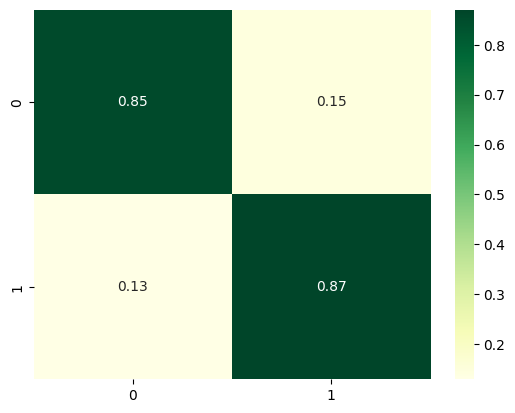

In [30]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

# Here, we are creating a confusion matrix which compares actual and predicted values
#results = confusion_matrix(actual, predicted) 
results = confusion_matrix(y_test, y_pred) 

print ('Confusion Matrix :')
print((results) )

results = results.astype('float') / results.sum(axis=1)[:, np.newaxis]  ### this to make percent instead of used numbers 

sns.heatmap(results, annot=True, cmap='YlGn');

print ('Accuracy Score :',accuracy_score(y_test, y_pred ))

print ('Report : ')
print (classification_report(y_test, y_pred) )

## Evaluation model use Train Data

Confusion Matrix :
[[7980   29]
 [  33 8155]]
Accuracy Score : 0.9961721306414768
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8009
           1       1.00      1.00      1.00      8188

    accuracy                           1.00     16197
   macro avg       1.00      1.00      1.00     16197
weighted avg       1.00      1.00      1.00     16197



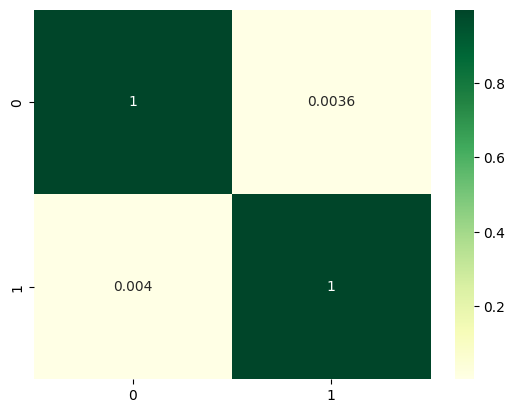

In [31]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report


# Here, we are creating a confusion matrix which compares actual and predicted values
#results = confusion_matrix(actual, predicted) 
results = confusion_matrix(y_train, y_pred_train) 

print ('Confusion Matrix :')
print((results) )

results = results.astype('float') / results.sum(axis=1)[:, np.newaxis]  ### this to make percent instead of used numbers 

sns.heatmap(results, annot=True, cmap='YlGn');
print ('Accuracy Score :',accuracy_score(y_train, y_pred_train ))

print ('Report : ')
print (classification_report(y_train, y_pred_train) )

## Tune Hyperparameter 

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Define the Random Forest model for classification
model = RandomForestClassifier()

# Define evaluation using stratified k-fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define search space (hyperparameters for Random Forest)
space = dict()
space['n_estimators'] = [100, 200, 300, 400, 500]  # Number of trees in the forest
space['criterion'] = ['gini', 'entropy']  # Splitting criterion
space['max_depth'] = [None, 10, 20, 30, 40, 50]  # Maximum depth of the trees
space['min_samples_split'] = [2, 5, 10]  # Minimum number of samples required to split an internal node
space['min_samples_leaf'] = [1, 2, 4]  # Minimum number of samples required to be at a leaf node

# Define the randomized search
search = RandomizedSearchCV(model, space, n_iter=10, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1) 
# we should choose one from this [100, 200, 300, 400, 500] but will take long tine so we choose 10 to get results quick 

# Execute the search
result = search.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Summarize the result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


4739.42s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4739.41s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4739.42s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4739.43s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4739.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4739.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4739.46s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
4739.47s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0

Best Score: 0.8697489051057784
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'entropy'}


In [33]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier( n_estimators= 300, min_samples_split= 5, min_samples_leaf=1, max_depth=30, criterion= 'entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_split=5,
                       n_estimators=300)

## Prediction

In [34]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

## Evaluation Model 

Confusion Matrix :
[[2282  388]
 [ 356 2374]]
Accuracy Score : 0.8622222222222222
Report : 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2670
           1       0.86      0.87      0.86      2730

    accuracy                           0.86      5400
   macro avg       0.86      0.86      0.86      5400
weighted avg       0.86      0.86      0.86      5400



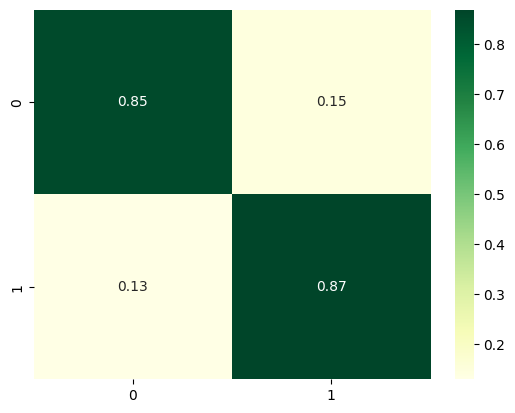

In [35]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report


# Here, we are creating a confusion matrix which compares actual and predicted values
#results = confusion_matrix(actual, predicted) 
results = confusion_matrix(y_test, y_pred) 

print ('Confusion Matrix :')
print((results) )

results = results.astype('float') / results.sum(axis=1)[:, np.newaxis]  ### this to make percent instead of used numbers 

sns.heatmap(results, annot=True, cmap='YlGn');

print ('Accuracy Score :',accuracy_score(y_test, y_pred ))

print ('Report : ')
print (classification_report(y_test, y_pred) )

In [43]:
from sklearn.metrics import roc_curve     # this method roc_curve() retune 3 out put false positive rate and true positive rate and threshold 

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)

In [42]:
from sklearn.metrics import roc_auc_score

auc_test = roc_auc_score(y_test, y_pred)
auc_train = roc_auc_score(y_train, y_pred_train)

print('AUC Test:%.3f'% auc_test)
print('AUC Train:%.3f'% auc_train)

AUC Test:0.862
AUC Train:0.981


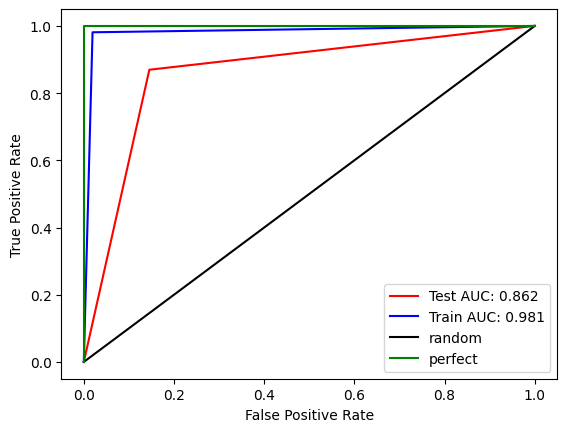

In [45]:
import matplotlib.pyplot as plt

plt.plot(fpr_test,tpr_test,'r-',label = 'Test AUC: %.3f'%auc_test)
plt.plot(fpr_train,tpr_train,'b-', label= 'Train AUC: %.3f'%auc_train)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()